## Reading the npz for summary data

In [18]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
plt.style.use("default")

In [19]:
# dir = "wall implemetation\wall_size_experiment\wall_64"
dir = str(os.getcwd())
filenames = os.listdir(os.getcwd())

wall_lengths = []
folders = []

stream_list_x = []
stream_list_y = []
stream_boundaries = []

## Dictionary for storing the data

def read_summary_file(filepath):
    summary_data = {}
    with open(filepath, 'r') as file:
        for line in file:
            # Split the line into key and value
            key, value = line.strip().split(': ')
            # Store the key-value pair in the dictionary
            summary_data[key] = float(value) if '.' in value or value.isdigit() else value
    return summary_data

simulations = []
for item in filenames:
    
    
    if item[:4] == "wall":
        data = {"wall length": 0, "stream": 0, "histogram":0, "angle": 0, "angle_std": 0, "steps": 0, "alignment_average": 0}
        folder = dir + "/" + item
        wall_length = item.split("_")[1]
        data["wall length"] = float(wall_length)

        ### Loading streamplot data
        stream_data = np.load(folder + f"/stream_plot_{wall_length}_3.npz")
        stream_x = stream_data["X"]
        stream_y = stream_data["Y"]
        stream_boundaries = [stream_x, stream_y]
        data["stream"] = [stream_data[stream_data.files[2]],stream_data[stream_data.files[3]]]

        ### Loading histogram data
        histogram_data = np.load(folder + f"/histogram_data_{wall_length}_3.npz")
        data["histogram"] = histogram_data["hist"]

        ### Loading alignment data
        alignment_data = np.load(folder + f"/alignment_{wall_length}_3.npz")
        data["angle"] = alignment_data["angles"]
        data["angle_std"] = alignment_data["std"]

        ### Loading summary data
        summary_file = folder + f"/simulation_parameters_{wall_length}.txt"
        summary_data = read_summary_file(summary_file)
        data["steps"] = summary_data['Total number of steps']
        data["alignment_average"] = summary_data['Alignment average steps']

        simulations.append(data)

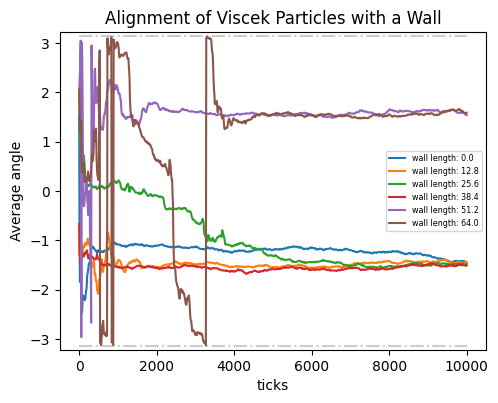

In [20]:
text_width = 5.5
fig_width = text_width
fig_height = 0.75* fig_width
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
for simulation in simulations:
    angle = simulation["angle"]
    steps = simulation["steps"]
    alignment_average_frames = simulation["alignment_average"]

    times = np.arange(0,steps +1, alignment_average_frames)
    ax.plot(times, angle, label = f"wall length: {simulation["wall length"]:.1f}")

ax.set_ylim(-3.22,3.22)
ax.legend(fontsize = "xx-small")
ax.plot([0,times.max()],[-np.pi, -np.pi], linestyle = "-.", color = "grey", alpha = 0.4) ## Lower angle limit
ax.plot([0,times.max()],[np.pi, np.pi], linestyle = "-.", color = "grey", alpha = 0.4) ## Upper angle limit
ax.set_xlabel("ticks")
ax.set_ylabel("Average angle")
ax.set_title("Alignment of Viscek Particles with a Wall")

filename = f"alignment_rho={summary_data['Density (rho)']}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
# plt.savefig(filepath, dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed
plt.show()

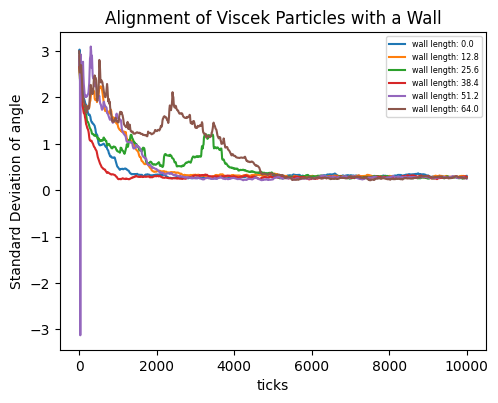

In [23]:
text_width = 5.5
fig_width = text_width
fig_height = 0.75* fig_width
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

for simulation in simulations:
    steps = simulation["steps"]
    alignment_average_frames = simulation["alignment_average"]
    std_angles = simulation["angle_std"]

    times = np.arange(0,steps +1, alignment_average_frames)
    ax.plot(times, std_angles, label = f"wall length: {simulation["wall length"]:.1f}")

ax.legend(fontsize = "xx-small")
ax.set_xlabel("ticks")
# ax.set_xlim(-50,5000)
ax.set_ylabel("Standard Deviation of angle")
ax.set_title("Alignment of Viscek Particles with a Wall")

filename = f"angle_spread_rho={summary_data['Density (rho)']}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
# plt.savefig(filepath, dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed
plt.show()

In [22]:
print(summary_data["Density (rho)"])

1.0
